Using this Kaggle data (https://www.kaggle.com/anthonypino/melbourne-housing-market) create a model to predict a house's value. We want to be able to understand what creates value in a house, as though we were a real estate developer.

In [1]:
# Import the necessary modules
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

C:\Users\maken\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
original = pd.read_csv('D:\\Data\\melbourne-housing-market\\Melbourne_housing_extra_data-18-08-2017.csv')
#original = pd.read_csv('C:\\Users\\mkennedy\\Documents\\GitHub\\Thinkful_Unit_3\\Melbourne\\Melbourne_housing_FULL-26-09-2017.csv')

In [3]:
data = original

In [4]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,1,NaN,SS,Jellis,3/9/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/2/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/2/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/3/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
data.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
19736,Windsor,201/152 Peel St,2,u,560000.0,PI,hockingstuart,29/07/2017,4.6,3181.0,...,1.0,1.0,0.0,61.6,2012.0,Stonnington,-37.85581,144.99025,Southern Metropolitan,4380.0
19737,Wollert,60 Saltlake Bvd,3,h,525300.0,S,Stockdale,29/07/2017,25.5,3750.0,...,2.0,2.0,400.0,NaN,NaN,Whittlesea,-37.61387,145.03850,Northern Metropolitan,2940.0
19738,Yarraville,2 Adeney St,2,h,750000.0,SP,hockingstuart,29/07/2017,6.3,3013.0,...,1.0,2.0,269.0,NaN,NaN,Maribyrnong,-37.81649,144.86731,Western Metropolitan,6543.0
19739,Yarraville,54 Pentland Pde,6,h,2450000.0,VB,Village,29/07/2017,6.3,3013.0,...,3.0,2.0,1087.0,388.5,1920.0,Maribyrnong,-37.81038,144.89389,Western Metropolitan,6543.0
19740,Yarraville,10/127 Somerville Rd,3,t,645000.0,SP,Jas,29/07/2017,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,6543.0


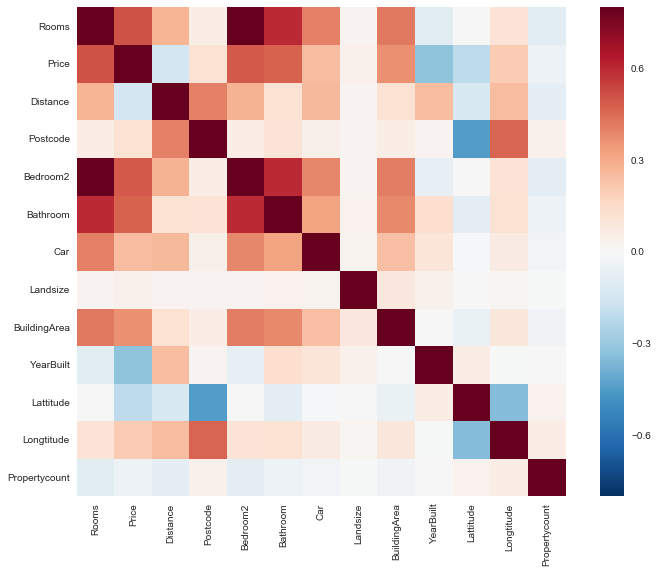

In [6]:
# Create a heatmap to compare the correlation of the columns.

corrmat = data.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

# Cleaning the data

In [7]:
# Since there are a lot of columns around the area (address, zip, etc.), 
# find out which ones have the least amount of missing data.
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             4344
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          4055
Bathroom          4055
Car               4055
Landsize          4082
BuildingArea     11359
YearBuilt        10092
CouncilArea       4085
Lattitude         3937
Longtitude        3937
Regionname           1
Propertycount        1
dtype: int64

In [8]:
# Since Suburb has no missing values, use this to represent general area.
# Drop other area-related columns
#data.drop(['Address','Distance', 'Postcode','CouncilArea','Lattitude','Longtitude','Regionname'], axis=1)
drop_columns = data[['Address','Distance', 'Postcode','CouncilArea','Lattitude','Longtitude','Regionname']]
#print(drop_columns)
data.drop(drop_columns, axis=1)
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,1,NaN,SS,Jellis,3/9/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/2/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/2/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/3/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [9]:
# Converting Suburb into values based on categories
data['Suburb'] = data['Suburb'].astype('category')
data['Suburb'] = data['Suburb'].cat.codes
#data.head()
data['Suburb'].nunique()

330

In [10]:
# Converting dates to datetime64
data['Date'] = pd.to_datetime(data['Date'])

In [11]:
################# Is this necessary?
# Converting YearBuilt to datetime64
#data['YearBuilt'] = pd.to_datetime(data['YearBuilt'], format = '%Y')
#data['YearBuilt'] = data['YearBuilt'].dt.year

In [12]:
# Converting each housing type into a binary value
data['house'] = False
data.loc[data['Type'] == 'h', 'house'] = True
data['unit'] = False
data.loc[data['Type'] == 'u', 'unit'] = True
data['townhouse'] = False
data.loc[data['Type'] == 't', 'townhouse'] = True

In [13]:
new_data = data[['Suburb', 'house', 'unit', 'townhouse', 'Rooms', 'Price', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']]
new_data

,Suburb,house,unit,townhouse,Rooms,Price,Bathroom,Car,Landsize,BuildingArea,YearBuilt
0,0,False,False,False,2,NaN,1.0,1.0,126.0,NaN,NaN
1,0,True,False,False,2,1480000.0,1.0,1.0,202.0,NaN,NaN
2,0,True,False,False,2,1035000.0,1.0,0.0,156.0,79.00,1900.0
3,0,False,True,False,3,NaN,2.0,1.0,0.0,NaN,NaN
4,0,True,False,False,3,1465000.0,2.0,0.0,134.0,150.00,1900.0
5,0,True,False,False,3,850000.0,2.0,1.0,94.0,NaN,NaN
6,0,True,False,False,4,1600000.0,1.0,2.0,120.0,142.00,2014.0
7,0,True,False,False,4,NaN,2.0,2.0,400.0,220.00,2006.0
8,0,True,False,False,2,NaN,1.0,2.0,201.0,NaN,1900.0
9,0,True,False,False,2,NaN,2.0,1.0,202.0,NaN,1900.0


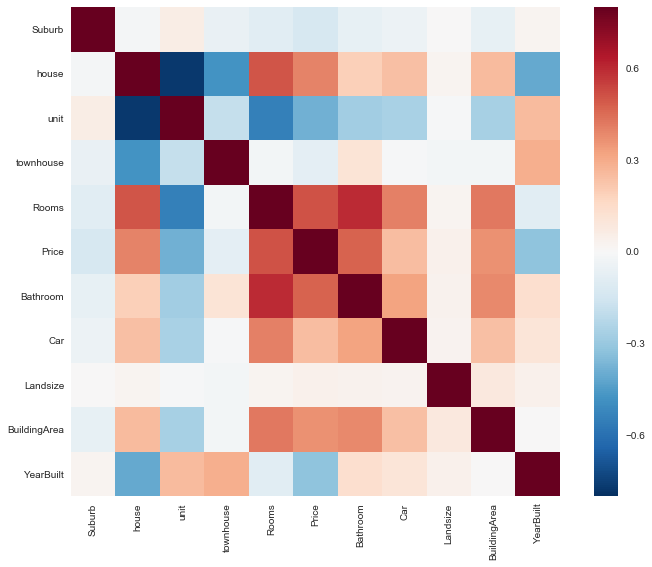

In [14]:
# Create a heatmap to compare the correlation of the columns.

corrmat = new_data.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

# Filling Missing Values
### Create a function that populates missing values by comparing them to values contained in a row of similar components. For example, a two bedroom, two bathroom townhouse with a missing price should have its price populated with the average price of other two bedroom, two bathroom townhouses. 

In [24]:
# Fill the missing Bathroom counts
fill_bathrooms = data.groupby(['house', 'unit', 'townhouse', 'Rooms', 'Price'])['Bathroom'].apply(lambda x: x.fillna(x.mean()))
data['Bathroom'] = data.Bathroom.fillna(fill_bathrooms)

In [17]:
cleaned_car = data.groupby(['house', 'unit', 'townhouse', 'Rooms','Bathroom'])['Car'].apply(lambda x: x.fillna(x.mean()))
data['Car'] = data.Car.fillna(cleaned_car)

In [18]:
cleaned_landsize = data.groupby(['house', 'unit', 'townhouse', 'Rooms','Bathroom', 'Car'])['Landsize'].apply(lambda x: x.fillna(x.mean()))
data['Landsize'] = data.Landsize.fillna(cleaned_landsize)

In [19]:
cleaned_buildingArea = data.groupby(['house', 'unit', 'townhouse', 'Rooms','Bathroom', 'Car', 'Landsize'])['BuildingArea'].apply(lambda x: x.fillna(x.mean()))
data['BuildingArea'] = data.BuildingArea.fillna(cleaned_buildingArea)

In [20]:
cleaned_yearBuilt = data.groupby(['house', 'unit', 'townhouse', 'Rooms','Bathroom', 'Car', 'Landsize', 'BuildingArea'])['YearBuilt'].apply(lambda x: x.fillna(x.median()))
data['YearBuilt'] = data.YearBuilt.fillna(cleaned_yearBuilt)

In [21]:
# Fill missing prices with the mean price
cleaned_price = data.groupby(['house', 'unit', 'townhouse', 'Rooms','Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt'])['Price'].apply(lambda x: x.fillna(x.mean()))
data['Price'] = data.Price.fillna(cleaned_price)

Previous Null Value Count:

Suburb               0

Address              0

Rooms                0

Type                 0

Price             4344

Method               0

SellerG              0

Date                 0

Distance             1

Postcode             1

Bedroom2          4055

Bathroom          4055

Car               4055

Landsize          4082

BuildingArea     11359

YearBuilt        10092

CouncilArea       4085

Lattitude         3937

Longtitude        3937

Regionname           1

Propertycount        1

In [22]:
# Check to see if there are any remaining nulls
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price            3740
Method              0
SellerG             0
Date                0
Distance            1
Postcode            1
Bedroom2         4055
Bathroom         1742
Car              3071
Landsize         4050
BuildingArea     8163
YearBuilt        8173
CouncilArea      4085
Lattitude        3937
Longtitude       3937
Regionname          1
Propertycount       1
house               0
unit                0
townhouse           0
dtype: int64

# Creating the Model and Determining the Best Explanatory Features
### Gradient Boosting will allow for the determination of the best explanatory features

In [25]:
# Trying PCA to find best explanatory features before trying Gradient Boost

X = data[['house', 'unit', 'townhouse', 'Rooms','Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']]
Y = data['Price']

sklearn_pca = PCA(n_components=4)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [29]:
# To find best explanatory features, run the model with a dataset that has dropped any remaning na values
purged_data = new_data.dropna()
purged_data['Price'] = purged_data['Price'].astype(int)
print(len(purged_data))
X = purged_data[['house', 'unit', 'townhouse', 'Rooms','Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']]
Y = purged_data['Price']

6204


C:\Users\maken\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
# Create training and test sets.
offset = int(X.shape[0] * 0.8)

# Put 90% of the data in the training set.
X_train, Y_train = X[:offset], Y[:offset]

# And put 10% in the test set.
X_test, Y_test = X[offset:], Y[offset:]

In [ ]:
# Create Gradient Boosting Classifier
params = {'n_estimators': 100,
          'max_depth': 5,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train,Y_train)
y_pred = clf.fit(X_train,Y_train).predict(X_test)


# Print the accuracy of the model and store it in the table
print('Accuracy of the model:')
print(clf.score(X_test,Y_test))

In [ ]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
X = new_data.drop('Price', 1)
Y = new_data['Price']